In [1]:
# import lib
from nltk.stem.snowball import SnowballStemmer
import numpy as np
from scipy import stats
from collections import Counter
import pandas as pd
import scipy as sp
from scipy.stats import mode
from sklearn import linear_model
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import matplotlib
import matplotlib.pyplot as plt
from sklearn import discriminant_analysis
from sklearn.decomposition import PCA
from sklearn import preprocessing
import sklearn.discriminant_analysis as da
from sklearn import preprocessing
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DecisionTree
from sklearn.ensemble import RandomForestClassifier as RandomForest
from sklearn.svm import SVC
from sklearn.cross_validation import train_test_split
import random
from sklearn.linear_model import LogisticRegressionCV as LogRegCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from datetime import datetime
%matplotlib inline

## Reviews Model

In [2]:
# first, we load the data 
# added two ,, in the end 
listings_df = pd.read_csv('listings.csv', header = 0)
calendar_df = pd.read_csv('calendar.csv', usecols=range(0,4), index_col=False)
reviews_df = pd.read_csv('reviews.csv', header = 0)

In [3]:
# see reviews
reviews_df.head()
# get columns, listing_id and "comments" 
sub_reviews = reviews_df[['listing_id','comments']]
sub_reviews.head()

,listing_id,comments
0,1180670,"Ok, if you like the location and don't mind an..."
1,4457617,"Kleine süße WG, super gelegen, sehr freundlich..."
2,722394,Extremely disappointed.
3,4074444,Exactly as described.
4,68046,"Appartement très sympa, accueillant. A quelque..."


In [4]:
# id & name of listing from listings.csv
sub_listings = listings_df[['id','name','price']]
sub_listings.head()

,id,name,price
0,1069266,Stay like a real New Yorker!,$160.00
1,1846722,Apartment 20 Minutes Times Square,$105.00
2,2061725,Option of 2 Beds w Private Bathroom,$58.00
3,44974,Charming Bright West Village Studio,$185.00
4,4701675,Charming Apartment in Chelsea,$195.00


In [5]:
print 'The number of listings with reviews is', len(set(sub_listings.id.values))
print 'The total number of listings is', len(set(sub_reviews.listing_id.values)) 
print 'The total number of reviews is', len(reviews_df)

The number of listings with reviews is 27392
The total number of listings is 19028
The total number of reviews is 277659


Many listings don't have reviews.

In [7]:
list_reviews = [None] * len(sub_listings)
for i in range(len(sub_listings)):
    ID = sub_listings['id'][i]
    if len(sub_reviews[sub_reviews.listing_id == ID]) > 0: 
        list_reviews[i] = sub_reviews[sub_reviews.listing_id == ID].comments.values
        for j in range(len(list_reviews[i])):
            text = []
            text.append(list_reviews[i][j])
        list_reviews[i] = text[0]
    else: 
        list_reviews[i] = None

In [8]:
sub_listings['reviews'] = list_reviews
sub_listings.head()

/Users/chen/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,id,name,price,reviews
0,1069266,Stay like a real New Yorker!,$160.00,Michael was the perfect host. Had everything r...
1,1846722,Apartment 20 Minutes Times Square,$105.00,Denise is a really nice woman!
2,2061725,Option of 2 Beds w Private Bathroom,$58.00,I had spent one entire month at Miao's with a ...
3,44974,Charming Bright West Village Studio,$185.00,We had a great stay at Sara's flat in the West...
4,4701675,Charming Apartment in Chelsea,$195.00,We had a wonderful stay at Charles' place. It ...


In [9]:
sub_listings['combined'] = sub_listings.name.astype(str).str.cat(sub_listings.reviews.astype(str), sep=',')

/Users/chen/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [10]:
sub_listings

,id,name,price,reviews,combined
0,1069266,Stay like a real New Yorker!,$160.00,Michael was the perfect host. Had everything r...,"Stay like a real New Yorker! ,Michael was the ..."
1,1846722,Apartment 20 Minutes Times Square,$105.00,Denise is a really nice woman!,"Apartment 20 Minutes Times Square,Denise is a ..."
2,2061725,Option of 2 Beds w Private Bathroom,$58.00,I had spent one entire month at Miao's with a ...,"Option of 2 Beds w Private Bathroom,I had spen..."
3,44974,Charming Bright West Village Studio,$185.00,We had a great stay at Sara's flat in the West...,"Charming Bright West Village Studio,We had a g..."
4,4701675,Charming Apartment in Chelsea,$195.00,We had a wonderful stay at Charles' place. It ...,"Charming Apartment in Chelsea,We had a wonderf..."
5,68914,Calm & Sunny Apt in Carroll Gardens,$165.00,"Price was available to let us in, show us arou...","Calm & Sunny Apt in Carroll Gardens,Price was ..."
6,4832596,Large furnished sunny room,$80.00,None,"Large furnished sunny room,None"
7,2562510,2 br Private Room in LI/Chinatown,$120.00,None,"2 br Private Room in LI/Chinatown,None"
8,3005360,Hip Luxury in the East Village 2BD,$150.00,This place is tight quarters but cozy. 4th flo...,"Hip Luxury in the East Village 2BD,This place ..."
9,2431607,Bright Airy Room for 2,$40.00,"This was my first experience using Airbnb, and...","Bright Airy Room for 2 ,This was my first expe..."


In [18]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [19]:
# import NLTK 
print(" ".join(SnowballStemmer.languages))
# stemmer for english
stemmer = SnowballStemmer('english', ignore_stopwords=True)

danish dutch english finnish french german hungarian italian norwegian porter portuguese romanian russian spanish swedish


In [20]:
# try for the first listing
print stemmer.stem(sub_listings['combined'][0])

stay like a real new yorker! ,michael was the perfect host. had everything ready and prepared for arrival and departure. apartment was exactly what i wanted close to un in a good neighborhood. would stay again



In [ ]:
stems = []
for i in range(len(sub_listings)):
    cleaned = unicode(sub_listings['combined'][i], "utf-8")
    stemmed = stemmer.stem(cleaned)
    stems.append(stemmed)

In [22]:
sub_listings['stems'] = stems
sub_listings.head()

/Users/chen/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,id,name,price,reviews,combined,stems
0,1069266,Stay like a real New Yorker!,$160.00,Michael was the perfect host. Had everything r...,"Stay like a real New Yorker! ,Michael was the ...","stay like a real new yorker! ,michael was the ..."
1,1846722,Apartment 20 Minutes Times Square,$105.00,Denise is a really nice woman!,"Apartment 20 Minutes Times Square,Denise is a ...","apartment 20 minutes times square,denise is a ..."
2,2061725,Option of 2 Beds w Private Bathroom,$58.00,I had spent one entire month at Miao's with a ...,"Option of 2 Beds w Private Bathroom,I had spen...","option of 2 beds w private bathroom,i had spen..."
3,44974,Charming Bright West Village Studio,$185.00,We had a great stay at Sara's flat in the West...,"Charming Bright West Village Studio,We had a g...","charming bright west village studio,we had a g..."
4,4701675,Charming Apartment in Chelsea,$195.00,We had a wonderful stay at Charles' place. It ...,"Charming Apartment in Chelsea,We had a wonderf...","charming apartment in chelsea,we had a wonderf..."


In [51]:
# function to set dummy varibles for price tags
def set_price_dummy(df, num):
    for i in df.id.values:
        df_new1.set_value(df_new1.loc[df_new1.id == i].index, 'price_tag', num)

In [52]:
df_new = sub_listings.drop(['name', 'reviews', 'combined'], axis = 1)
df_new.head()

,id,price,stems
0,1069266,$160.00,"stay like a real new yorker! ,michael was the ..."
1,1846722,$105.00,"apartment 20 minutes times square,denise is a ..."
2,2061725,$58.00,"option of 2 beds w private bathroom,i had spen..."
3,44974,$185.00,"charming bright west village studio,we had a g..."
4,4701675,$195.00,"charming apartment in chelsea,we had a wonderf..."


In [53]:
# clean up prices, delete dollar sign
prices_tmp = df_new.price
prices = []
# delete all ,
for i in prices_tmp:
    prices.append(i.replace(',', ''))    
prices = [float(i[1:]) for i in prices]
df_new1 = df_new.drop(['price'], axis=1)
df_new1['price'] = prices
df_new1.head()

,id,stems,price
0,1069266,"stay like a real new yorker! ,michael was the ...",160.0
1,1846722,"apartment 20 minutes times square,denise is a ...",105.0
2,2061725,"option of 2 beds w private bathroom,i had spen...",58.0
3,44974,"charming bright west village studio,we had a g...",185.0
4,4701675,"charming apartment in chelsea,we had a wonderf...",195.0


In [54]:
# we split them up into 5 intervals, so intervals are small but still allow us to retain accuracy
price_1 = np.percentile(df_new1.price, 20)
price_2 = np.percentile(df_new1.price, 40)
price_3 = np.percentile(df_new1.price, 60)
price_4 = np.percentile(df_new1.price, 80)

# 10 dfs
df_class1 = df_new1[df_new1['price'] <= price_1]
df_class2 = df_new1[(df_new1['price'] > price_1) & (df_new1['price'] <= price_2)]
df_class3 = df_new1[(df_new1['price'] > price_2) & (df_new1['price'] <= price_3)]
df_class4 = df_new1[(df_new1['price'] > price_3) & (df_new1['price'] <= price_4)]
df_class5 = df_new1[(df_new1['price'] > price_4)]

# make a new DF with new classes
df_new1 = df_new1.copy()
df_new1['price_tag'] = np.zeros(len(df_new1.price))

# set
set_price_dummy(df_class1, 1)
set_price_dummy(df_class2, 2)
set_price_dummy(df_class3, 3)
set_price_dummy(df_class4, 4)
set_price_dummy(df_class5, 5)

# drop and save price
dropped_price = df_new1.price
df_new11 = df_new1.drop(['price', 'id'], axis=1)
y_df = df_new11['price_tag']
x_df = df_new11['stems']
x_df.head()

0    stay like a real new yorker! ,michael was the ...
1    apartment 20 minutes times square,denise is a ...
2    option of 2 beds w private bathroom,i had spen...
3    charming bright west village studio,we had a g...
4    charming apartment in chelsea,we had a wonderf...
Name: stems, dtype: object

In [65]:
# turn the set into train and test
# get X and Y
vectorizer = CountVectorizer(stop_words='english', min_df=1)
corpus = x_df.values
x = vectorizer.fit_transform(corpus)
x = x.toarray()
y = y_df.values

# test and train split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)

In [66]:
print x_train

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


In [57]:
#Get the names of all the words we're counting
feature_names = vectorizer.get_feature_names()
print 'data shape:', x.shape
print 'some features:', feature_names[0:10]

data shape: (27392, 31309)
some features: [u'00', u'000', u'000sq', u'000sqft', u'00am', u'00h', u'00pm', u'01', u'02', u'03']


In [58]:
#Number of top words
n = 20

#Count the number of time each word occurs in the entire dataset
word_freq = x.sum(axis=0)

#Sort the words by their total frequency in the dataset
words = zip(word_freq, feature_names)
top_words = (sorted(words, key=lambda t: t[0], reverse=True))[:n]

#Print the top n words and their frequencies
print top_words

[(18300, u'apartment'), (15219, u'great'), (11650, u'stay'), (11281, u'place'), (9935, u'room'), (8456, u'non'), (8103, u'clean'), (7513, u'location'), (6836, u'nice'), (6555, u'host'), (5320, u'really'), (5071, u'apt'), (4951, u'bedroom'), (4912, u'comfortable'), (4844, u'subway'), (4757, u'time'), (4737, u'nyc'), (4734, u'recommend'), (4582, u'new'), (4451, u'manhattan')]


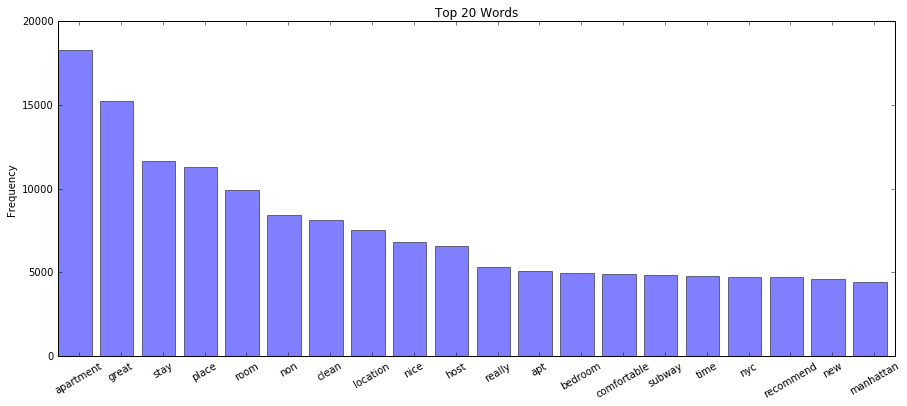

In [59]:
fig, ax = plt.subplots(1, 1, figsize=(15, 6))

#Number of bars to use
indices = np.arange(n)
#Where to put the label under each bar
width = 0.5
#Bar plot of the frequencies of the top words
ax.bar(indices, [word[0] for word in top_words], color='blue', alpha=0.5)

ax.set_ylabel('Frequency')
ax.set_title('Top ' + str(n) + ' Words')

#Label the bars with the top words
ax.set_xticks(indices + width)
ax.set_xticklabels([word[1] for word in top_words])

#Turn the labels sideways so they don't overlap
labels = ax.get_xticklabels()
plt.setp(labels, rotation=30, fontsize=10)

plt.show()

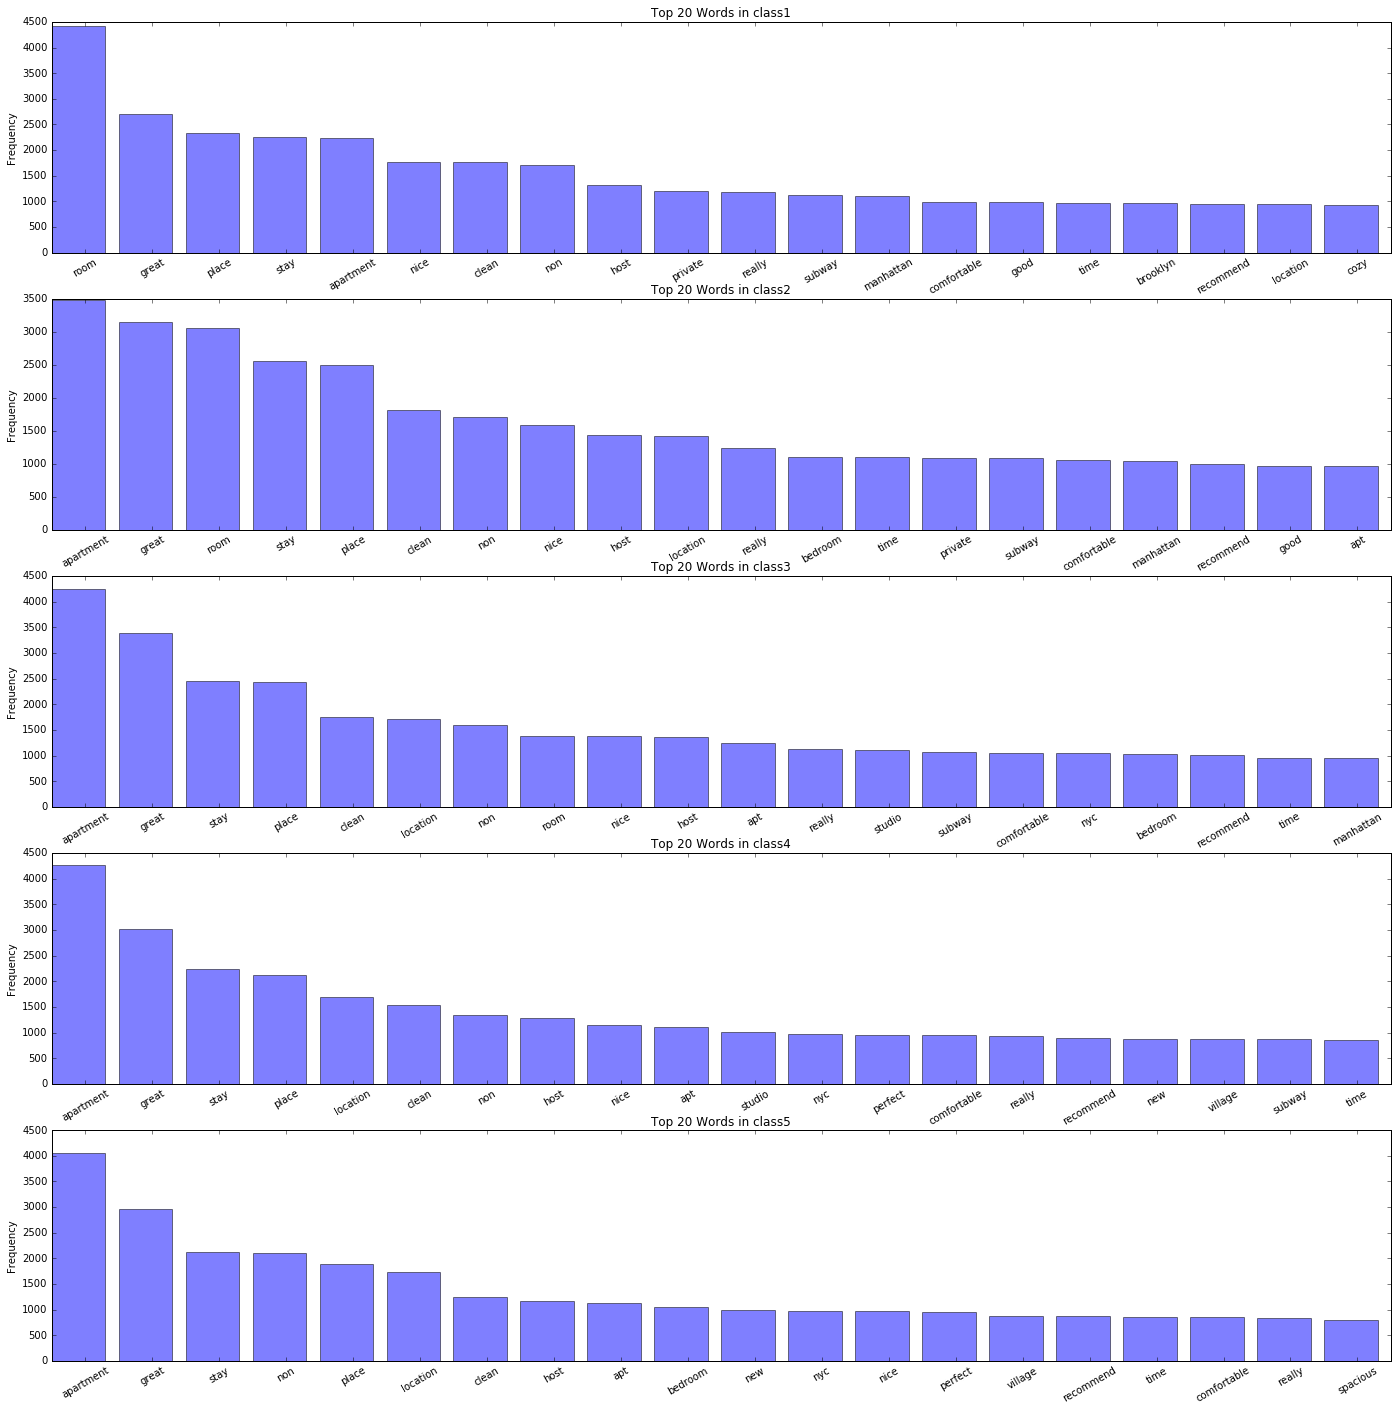

In [62]:
fig, ax = plt.subplots(5, 1, figsize=(24, 24))

#Number of bars to use
indices = np.arange(n)
#Where to put the label under each bar
width = 0.5

def set_ax(i):
    #Count the number of time each word occurs in the positive posts
    word_freq = x[y == i].sum(axis=0)
    #Sort the words by their total frequency in the dataset
    words = zip(word_freq, feature_names)
    top_words = (sorted(words, key=lambda t: t[0], reverse=True))[:n]
    #Bar plot of the frequencies of the top words
    ax[i-1].bar(indices, [word[0] for word in top_words], color='blue', alpha=0.5)
    ax[i-1].set_ylabel('Frequency')
    ax[i-1].set_title('Top ' + str(n) + ' Words in class' + str(i))
    #Label the bars with the top words
    ax[i-1].set_xticks(indices + width)
    ax[i-1].set_xticklabels([word[1] for word in top_words])
    #Turn the labels sideways so they don't overlap
    labels = ax[i-1].get_xticklabels()
    plt.setp(labels, rotation=30, fontsize=10)
    
set_ax(1)
set_ax(2)
set_ax(3)
set_ax(4)
set_ax(5)

plt.show()

In [67]:
# Generate array of L2 regularization parameters
regularization = 10.**np.arange(-10, 5)

#Fit logistic model with cross validation to select the optimal regularization parameter
logistic = LogRegCV(cv=5, 
                    penalty='l2', 
                    Cs=regularization, 
                    solver='liblinear', 
                    n_jobs=4)
logistic.fit(x_train, y_train)

#Print results
print 'Accuracy on overall test set:', logistic.score(x_test, y_test)
print 'Accuracy on class 1 in test set:', logistic.score(x_test[y_test == 1], y_test[y_test == 1])
print 'Accuracy on class 2 in test set:', logistic.score(x_test[y_test == 2], y_test[y_test == 2])
print 'Accuracy on class 3 in test set:', logistic.score(x_test[y_test == 3], y_test[y_test == 3])
print 'Accuracy on class 4 in test set:', logistic.score(x_test[y_test == 4], y_test[y_test == 4])
print 'Accuracy on class 5 in test set:', logistic.score(x_test[y_test == 5], y_test[y_test == 5])

Accuracy on overall test set: 0.323071306887
Accuracy on class 1 in test set: 0.372963186482
Accuracy on class 2 in test set: 0.806396344946
Accuracy on class 3 in test set: 0.0
Accuracy on class 4 in test set: 0.121918720853
Accuracy on class 5 in test set: 0.273345701917
